## **Nutrient Demands**

### **Acquiring Data**

In [9]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Importing
%pip install python-gnupg
%pip install eep153_tools
%matplotlib inline
import pandas as pd
import numpy as np
import eep153_tools
import cfe
from cfe import Regression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%run Acquiring_Dataframes.py

In [12]:
#Get saved result
ugd8_result = cfe.read_pickle('RGSN Files/Uganda19-20.rgsn')

In [13]:
#Reference prices
pbar = ugd8_p.mean(axis=1)
pbar = pbar.reset_index(level="u", drop=True) 
pbar = pbar.reindex(ugd8_result.beta.index) 
pbar = pbar.replace(np.nan,1)
def my_prices(j,p0,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [17]:
#Budgets
xhat = ugd8_result.predicted_expenditures()
xbar = xhat.groupby(['i','t','m']).sum()
xref = xbar.quantile(0.5) 

In [18]:
#Food Quantities
qhat = (xhat.unstack('j')/ugd8_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
qhat = qhat.loc[:,qhat.count()>0]

### **Demands**

Text(0.5, 0, 'Quantities of Matoke Demanded')

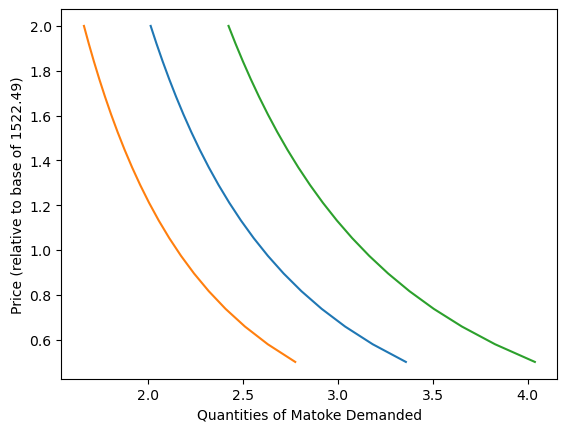

In [20]:
use = 'Matoke'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Matoke for household at median budget
plt.plot([ugd8_result.demands(xref,my_prices(use,pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Matoke for household at 25% percentile
plt.plot([ugd8_result.demands(xbar.quantile(0.25),my_prices(use,pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Matoke for household at 75% percentile
plt.plot([ugd8_result.demands(xbar.quantile(0.75),my_prices(use,pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

Text(0.5, 1.0, 'Engel Curves')

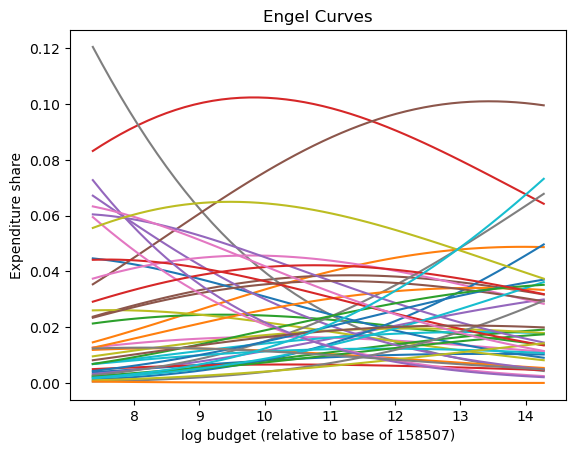

In [21]:
fig,ax = plt.subplots()

scale = np.geomspace(.01,10,50)

ax.plot(np.log(scale*xref),[ugd8_result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f})')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

### **Mapping to Nutrients**

In [22]:
ugd_fct

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
j,,,,,,,,,,,,,,,,,,,,
Apples,617.893,1.875,20.43,0,46.56,147.817,0.0,0.90,0.6625,0.0875,0,0.0,0.2131,0,0.1964,46.95,91.83,953.1,0.0,0
Avocado,1600.000,20.000,70.00,810,120.00,85.000,6.0,17.38,1.3000,0.6700,70,0.0,2.5700,100,6.0000,0.00,0.00,0.0,0.0,0
Beans (dry),1700.000,98.000,60.00,500,580.00,325.000,30.0,7.00,1.2000,3.4000,0,0.0,2.1500,10,8.0000,0.00,0.00,0.0,0.0,0
Beans (fresh),3470.000,214.000,160.00,5250,1130.00,626.000,51.0,11.74,2.1200,7.1300,0,0.0,4.7400,63,23.0000,0.00,0.00,0.0,0.0,0
Beef,2510.000,182.000,0.00,60,70.00,0.000,19.0,31.50,1.6000,0.9000,0,28.9,3.8000,0,37.0000,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water,0.000,0.000,0.00,0,30.00,0.000,0.0,0.00,0.0000,0.0000,0,0.0,0.0000,0,0.1000,10.00,0.00,0.0,0.0,0
Watermelon,300.000,6.100,4.00,30,70.00,75.500,2.4,1.78,0.2100,0.3300,280,0.0,0.4500,81,1.0000,0.00,0.00,0.0,0.0,0
Wheat (flour),3640.000,103.000,30.00,260,150.00,763.000,12.0,12.50,0.4000,1.2000,0,0.0,0.4400,0,7.0000,0.00,0.00,0.0,0.0,0


We need the index of the Food Conversion Table (FCT) to match up with
 the index of the vector of quantities demanded.   To manage this we
 make use of the `align` method for `pd.DataFrames`:

In [23]:
# Create a new FCT and vector of consumption that only share rows in common:
fct0,c0 = ugd_fct.align(qhat.T,axis=0,join='inner')
print(fct0.index)

Index(['Avocado', 'Beans (dry)', 'Beans (fresh)', 'Beef', 'Bogoya', 'Bread',
       'Cabbage (green)', 'Cassava (dry)', 'Cassava (fresh)', 'Chapati',
       'Cooking Oil (refined)', 'Dodo', 'Donuts', 'Eggplant', 'Eggs',
       'Goat Meat', 'Ground Nuts (pounded)', 'Ground Nuts (shelled)',
       'Irish Potatoes', 'Jam/Marmalade', 'Maize (cobs)', 'Maize (flour)',
       'Mangos', 'Matoke', 'Millet Flour', 'Mukene', 'Onions', 'Oranges',
       'Pumpkins', 'Rice', 'Salt', 'Restaurant (soda)',
       'Sweet Potatoes (fresh)', 'Tea (leaves)', 'Tomatoes', 'Waragi',
       'Yams (arrowroot)'],
      dtype='object', name='j')


Now, since rows of `fct0` and `c0` match, we can obtain nutritional
 outcomes from the inner (or dot, or matrix) product of the transposed
 `fct0` and `c0`:

In [24]:
# The @ operator means matrix multiply
N = fct0.T@c0

N  #NB: Uganda quantities are for previous 7 days

i,005fbc5779014a0290b088071bde9f72,00b48fb6bcf84dd581bd7b2be5f908a0,00c2b27287a74f948fef24a8de42825c,01e7608a258e42c7a2f5af8b551bc247,02087846085249d1ae73a1070233c8bb,02449af9963842c8b8f615b2232735b1,029532d2e0d640f888259f1851cfc929,03b2600846004af6ba212269261907a2,040ceeba10fc44d19c9499e31e34fbfc,044116a438c040a898ba43daf6bdc2ea,...,f8ca4422f362494fa2ed2aa7d6c70d48,f8e3e6b69ccf45bb8134bba7b7ebd373,f965c4a8834d4791b353f5a05e25097b,f9d72814a2ab4930a8368352921aa0aa,fae255f3472340588340c9ea2e571e2e,fc2bd45f4f544faeb8a816e3aa2b3130,fcdc4fd724164cf68fe3d0d7d09c3280,fce051c0d2254aa2996f1e6eb13f403b,fef6a31f5c8542aead247c12573e0307,ffb33b3ededa4019a02be24224ab0440
t,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,...,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20
m,Central,Central,Central,Central,Central,Central,Central,Central,Central,Central,...,Western,Western,Western,Western,Western,Western,Western,Western,Western,Western
n,,,,,,,,,,,,,,,,,,,,,
Energy,110813.233304,118606.455228,131811.483294,129862.062630,176853.677630,284012.957659,106679.025253,174076.725126,190203.516740,142904.077267,...,185436.787197,167326.707663,131246.399733,245548.154530,176485.596051,125314.944729,260371.759082,252271.422728,176776.228523,241730.730432
Protein,2287.257298,2446.861943,2848.062755,2618.953577,3675.164963,5951.456798,2154.095372,3728.897834,4571.100112,2903.851089,...,3884.513717,3828.037520,2923.914722,5453.462442,3703.772079,2664.484068,5411.772383,5664.844114,3804.172384,5554.775790
Fiber,1481.557384,1587.273901,1995.582370,1792.579137,2417.502684,4169.332403,1350.481752,2505.401649,2823.759335,1956.859429,...,2845.068657,2780.065867,2132.862123,4165.503380,2675.466551,1916.531422,4354.102917,4379.575126,2773.388904,4080.453028
Folate,22912.796532,24459.507450,33272.886305,28287.743167,38047.974953,59755.286577,20783.268111,37491.965792,40243.601153,29508.659800,...,43460.854853,41276.724377,33841.696904,59446.078804,42331.617414,29556.488722,65443.070708,68158.518683,44165.402912,58604.149111
Calcium,14725.467568,15722.912297,17785.301960,16391.269678,23079.566150,36076.830441,13350.703771,23480.200006,26579.356321,18309.639045,...,24325.943481,22629.460295,18102.910743,32937.410134,23116.566566,16575.519649,34958.159016,38034.981959,23438.810486,32543.859397
Carbohydrate,13282.726305,14216.469953,17462.151171,16523.113281,21906.426457,38044.743568,12473.401016,23259.740716,25298.207986,18532.101677,...,24191.093513,23560.713175,17826.101017,36489.301611,21737.919360,16225.258010,38843.033882,37760.234582,23008.729985,35857.153004
Iron,547.674555,585.974759,698.727178,646.031245,888.403327,1463.835087,510.014695,908.223109,1049.515350,715.502843,...,981.770107,954.176182,733.687607,1409.652599,923.086020,667.024285,1473.527361,1450.233975,950.976595,1398.656107


Of course, since we can compute the nutritional content of a vector of
 consumption goods `c0`, we can also use our demand functions to
 compute nutrition as a *function* of prices and budget.

In [25]:
def nutrient_demand(x,p):
    c = ugd8_result.demands(x,p)
    fct0,c0 = ugd_fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

With this `nutrient_demand` function in hand, we can see how nutrient
 outcomes vary with budget, given prices:

Text(0, 0.5, 'log nutrient')

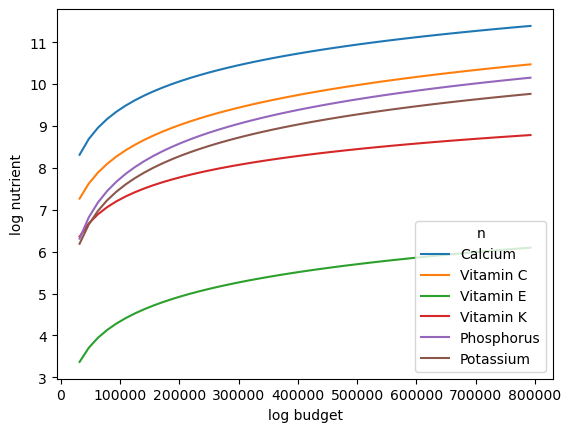

In [26]:
X = np.linspace(xref/5,xref*5,50)

UseNutrients = ['Calcium','Vitamin C', 'Vitamin E', 'Vitamin K', 'Phosphorus', 'Potassium']

df = pd.concat({myx:np.log(nutrient_demand(myx,pbar))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

Now how does nutrition vary with prices?

Text(0, 0.5, 'log nutrient')

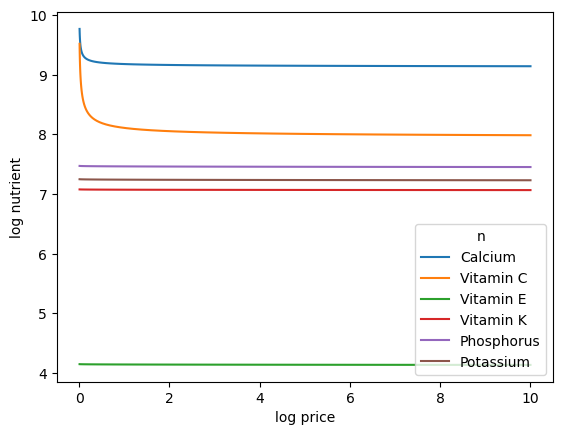

In [27]:
USE_GOOD = 'Oranges'

scale = np.geomspace(.01,10,50)

ndf = pd.DataFrame({s:np.log(nutrient_demand(xref/2,my_prices(USE_GOOD,pbar[USE_GOOD]*s)))[UseNutrients] for s in scale}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient')

### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in our data, the number of
different kinds of people can be computed by averaging over households:

In [28]:
# In first round, averaged over households and villages
dbar = ugd8_result.d[ugd_rdi.columns].mean()

Now, the inner/dot/matrix product between `dbar` and the `rdi`
DataFrame of requirements will give us minimum requirements for the
average household:

In [29]:
# This matrix product gives minimum nutrient requirements for
# the average household
hh_rdi = ugd_rdi@dbar

hh_rdi

n
Energy           9215.760171
Protein           203.773876
Fiber             129.020642
Folate           1717.880086
Calcium          5723.083512
Carbohydrate      701.610278
Iron               54.720771
Magnesium        1459.456103
Niacin             65.762741
Phosphorus       4294.856531
Potassium       23203.854390
Riboflavin          5.153533
Thiamin             5.012206
Vitamin A        3429.464668
Vitamin B-12       10.307281
Vitamin B-6         5.732505
Vitamin C         305.537473
Vitamin E          64.050107
Vitamin K         409.955032
Zinc               41.648822
dtype: float64

## Nutritional Adequacy of Food Demands

Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet for a household with counts of different kinds of people given by `z`.

In [30]:
def nutrient_adequacy_ratio(x,p,d,rdi=ugd_rdi,days=7):
    hh_rdi = ugd_rdi.replace('',0)@d*days

    return nutrient_demand(x,p)/hh_rdi

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.

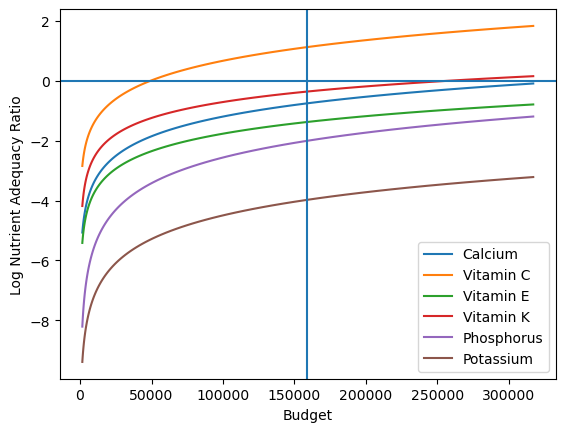

In [36]:
X = np.geomspace(.01*xref,2*xref,100)

pd.DataFrame({x:np.log(nutrient_adequacy_ratio(x,pbar,dbar))[UseNutrients] for x in X}).T.plot()
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('Log Nutrient Adequacy Ratio')
plt.axhline(0)
plt.axvline(xref)

As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of a single good:

Text(0.5, 0, 'Log Nutrient Adequacy Ratio')

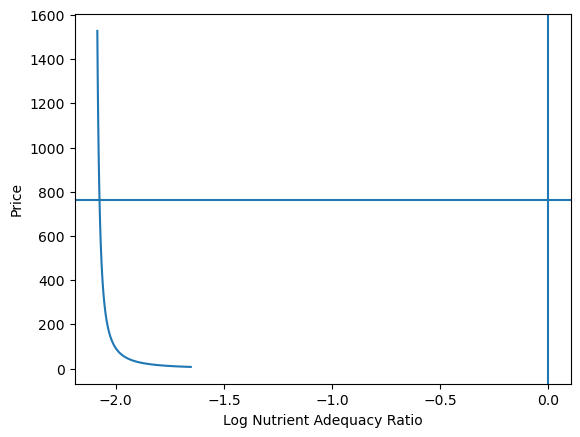

In [38]:
scale = np.geomspace(.01,2,50)

ndf = pd.DataFrame({s*pbar[USE_GOOD]:np.log(nutrient_adequacy_ratio(xref/4,my_prices(USE_GOOD,pbar[USE_GOOD]*s),dbar))[UseNutrients] for s in scale}).T

fig,ax = plt.subplots()
ax.plot(ndf['Calcium'],ndf.index)
ax.axhline(pbar[USE_GOOD])
ax.axvline(0)

ax.set_title('')
ax.set_ylabel('Price')
ax.set_xlabel('Log Nutrient Adequacy Ratio')

Text(0.5, 0, 'Log Nutrient Adequacy Ratio')

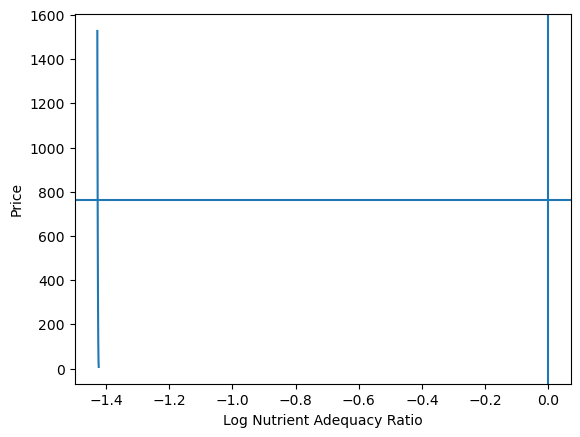

In [33]:
scale = np.geomspace(.01,2,50)

ndf = pd.DataFrame({s*pbar[USE_GOOD]:np.log(nutrient_adequacy_ratio(xref/4,my_prices(USE_GOOD,pbar[USE_GOOD]*s),dbar))[UseNutrients] for s in scale}).T

fig,ax = plt.subplots()
ax.plot(ndf['Vitamin K'],ndf.index)
ax.axhline(pbar[USE_GOOD])
ax.axvline(0)

ax.set_ylabel('Price')
ax.set_xlabel('Log Nutrient Adequacy Ratio')

Text(0.5, 0, 'Log Nutrient Adequacy Ratio')

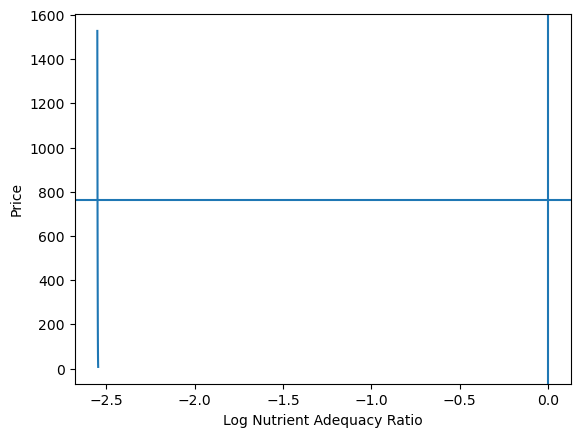

In [34]:
scale = np.geomspace(.01,2,50)

ndf = pd.DataFrame({s*pbar[USE_GOOD]:np.log(nutrient_adequacy_ratio(xref/4,my_prices(USE_GOOD,pbar[USE_GOOD]*s),dbar))[UseNutrients] for s in scale}).T

fig,ax = plt.subplots()
ax.plot(ndf['Vitamin E'],ndf.index)
ax.axhline(pbar[USE_GOOD])
ax.axvline(0)

ax.set_ylabel('Price')
ax.set_xlabel('Log Nutrient Adequacy Ratio')